In [31]:
#mengimport library
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np

In [32]:
# Download dataset winequality_red.csv di UCI Machine Learning
!wget -O winequality-red.csv https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2020-11-26 14:24:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K   315KB/s    in 0.3s    

2020-11-26 14:24:13 (315 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [33]:
# Load dataset
df = pd.read_csv('winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
# mengubah rate quality <= 5 = 0 (buruk) dan quality > 5 = 1 (baik)
label = []
for index, row in df.iterrows():
    if row["quality"] <= 5:
        label.append(0)
    else:
        label.append(1)

df["qualitylabel"] = label
df = df.drop(columns=['quality'])
df.tail

<bound method NDFrame.tail of       fixed acidity  volatile acidity  ...  alcohol  qualitylabel
0               7.4             0.700  ...      9.4             0
1               7.8             0.880  ...      9.8             0
2               7.8             0.760  ...      9.8             0
3              11.2             0.280  ...      9.8             1
4               7.4             0.700  ...      9.4             0
...             ...               ...  ...      ...           ...
1594            6.2             0.600  ...     10.5             0
1595            5.9             0.550  ...     11.2             1
1596            6.3             0.510  ...     11.0             1
1597            5.9             0.645  ...     10.2             0
1598            6.0             0.310  ...     11.0             1

[1599 rows x 12 columns]>

In [35]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualitylabel
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [36]:
# Menampilkan info dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  qualitylabel          1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
# Variabel dependen
y = df["qualitylabel"]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: qualitylabel, dtype: int64

In [38]:
# Variabel independen
x = df.drop(["qualitylabel"], axis = 1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [67]:
#Klasifikasi KNN
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state =123)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
# Mengaktifkan/memanggil/membuat fungsi klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Memasukkan data training pada fungsi klasifikasi KNN
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
# Menentukan hasil prediksi dari x_test
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1])

In [70]:
# Menentukan probabilitas hasil prediksi
knn.predict_proba(x_test)

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.6,

In [71]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[50 26]
 [11 73]]


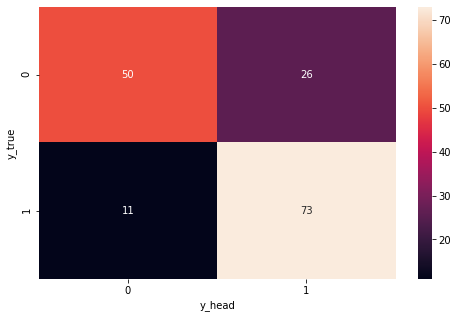

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f",
ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [73]:
# Nilai Akurasi
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.76875

In [74]:
# klasifikasi report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73        76
           1       0.74      0.87      0.80        84

    accuracy                           0.77       160
   macro avg       0.78      0.76      0.76       160
weighted avg       0.78      0.77      0.77       160

